---

# **Advanced Analysis of Textual Data and Hidden Pattern Detection**  

## **Introduction**  

In a world where customer reviews and social media directly influence the perception of a product or brand, **textual data analysis** has become an essential strategic tool. Through advanced **Natural Language Processing (NLP)** techniques, it is possible to extract key insights, detect emerging trends, and anticipate customer needs.  

The objective of this analysis is to **transform raw textual data into actionable insights**, thereby optimizing decision-making and enhancing the personalization of marketing campaigns.  

---  

## **Identifying Trends and Strategic Insights**  

Textual data analysis goes beyond merely reading reviews. It enables the **detection of recurring patterns, hidden relationships, and trend evolution** through advanced **segmentation, clustering, and predictive analysis** approaches.  

The challenge is to **understand what consumers truly think**, **anticipate their expectations**, and **optimize marketing strategies** based on emerging trends.  

---  

## **Methods and Techniques Used**  

### **1 - Correlation and Association Analysis**  
**Objective**: Identify relationships between **customer sentiments, mentioned products, and recurring issues**.  
- **Input**: `reviewText`, `sentiment`, `label`  
- **Output**: Correlations between sentiments and mentioned products, identification of recurring issues.  
- Detect links between negative reviews and specific events (e.g., the release of a new product).  
- Cross-analyze sentiment analysis with entity recognition to identify the most cited brands.  

**Example**: A surge in negative reviews is observed following a software update, allowing the company to anticipate and respond quickly.  

### **2 - Detection of Emerging Trends**  
**Objective**: Analyze the temporal evolution of topics and identify trends before they become mainstream.  
- **Input**: `reviewText`  
- **Output**: Emerging trends based on dominant keywords.  
- Extract **dominant keywords** over a given period.  
- Detect sudden changes in discussions to anticipate a trend.  

**Example**: A rise in mentions of "anti-pollution skincare" in customer reviews enables a cosmetics brand to quickly adapt its product offerings.  

---  

## **Concrete Application Example**  

A cosmetics company seeks to understand **emerging consumer preferences**. By analyzing discussions on **Twitter and customer reviews**, it detects an **increase in mentions of eco-friendly and vegan products**. Leveraging these insights, it decides to **launch an organic product line ahead of competitors**, ensuring an optimal strategic positioning.  

---  

## **Selected NLP Models and Justification**  

| **Step**                          | **Model Used**                                    | **Outcome** |
|----------------------------------|------------------------------------------------|------------------------|
| **Product/Brand Extraction**   | dslim/bert-base-NER                              | List of mentioned products/brands in reviews. |
| **Sentiment Analysis**         | distilbert-base-uncased-finetuned-sst-2-english | Correlations between sentiments and products/brands. |
| **Issue Identification**       | sentence-transformers/all-MiniLM-L6-v2          | List of recurring issues and their frequency in negative reviews. |
| **Extraction of Dominant Keywords** | sentence-transformers/all-MiniLM-L6-v2          | Clustering of reviews and extraction of dominant keywords. |
| **Summary Generation**         | facebook/bart-large-cnn                         | Informative summaries for each review cluster. |
| **Trend Detection**            | sentence-transformers/all-MiniLM-L6-v2          | Identification of emerging trends by comparing clusters. |  

---  

## **Conclusion**  

Advanced textual data analysis through **NLP models and segmentation techniques** enables the **transformation of raw data into actionable insights**.  

- **Enhanced personalization of marketing campaigns.**  
- **Informed decision-making based on trend analysis.**  
- **Increased responsiveness to market changes.**  

This work is **crucial** for effectively leveraging data in the next phases of the **MarketMind** project.  

---



---

# **I. Data Acquisition**  

### **Data Sources**  
- Customer reviews (Amazon, Trustpilot, etc.)  
- Social media (Twitter, Reddit)  

### **Collection Methods**  
- **Web Scraping**: Automated extraction of reviews from online platforms.  
- **Databases**: Use of public datasets.  

---



## 1- Import Libraries

In [ ]:
!pip install cufflinks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.3 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y pyarrow
!pip install --no-cache-dir pyarrow

Found existing installation: pyarrow 18.1.0
Uninstalling pyarrow-18.1.0:
  Successfully uninstalled pyarrow-18.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 194.7 MB/s eta 0:00:00


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [2]:
# Importation des bibliothèques
import json
import pandas as pd
from tqdm import tqdm  # Pour afficher une barre de progression
import matplotlib.pyplot as plt  # Pour la visualisation des données
import seaborn as sns  # Pour des graphiques plus attrayants
from wordcloud import WordCloud  # Pour créer des nuages de mots
from collections import Counter  # Pour compter les mots les plus fréquents
from nltk.corpus import stopwords  # Pour supprimer les stopwords
from nltk.stem import WordNetLemmatizer  # Pour la lemmatisation
import nltk
#NLTK libraries
from nltk.stem import WordNetLemmatizer
import nltk
import re
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import cufflinks as cf
cf.go_offline()
cf.set_config_file(world_readable=True)
from collections import defaultdict
import pandas as pd
from tqdm import tqdm
from sklearn.utils import resample


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 2- Loading Data  

CSV files containing customer reviews are loaded and processed for analysis.  


**Conversion en DataFrame**

In [5]:
# Conversion en DataFrame
df = pd.read_csv("dataReview.csv")

In [6]:

# Affichage des premières lignes du DataFrame
print("\nPremières lignes du DataFrame :")
df.head()


Premières lignes du DataFrame :


,asin,reviewText,overall,category,summary
0,B000GLRREU,While this Waterpik is not a total alternative...,5.0,All_Beauty_5,A must have for braces!
1,B000FI4S1E,"very masculine smell, perfect for camping or f...",5.0,All_Beauty_5,hair body wash
2,B000URXP6E,"I love this hard to find lotion/fragrance, as ...",5.0,All_Beauty_5,Escada Moon Sparkle
3,B0009RF9DW,I only use this in the winter as the beautiful...,5.0,All_Beauty_5,Wonderful stuff.
4,B01BNEYGQU,Colgate is my favorite brand of toothpaste. I...,4.0,All_Beauty_5,Offers Many Benefits For Growing Adult Teeth


# II. Data Understanding

In [8]:
df.head()

,asin,reviewText,overall,category,summary
0,B000GLRREU,While this Waterpik is not a total alternative...,5.0,All_Beauty_5,A must have for braces!
1,B000FI4S1E,"very masculine smell, perfect for camping or f...",5.0,All_Beauty_5,hair body wash
2,B000URXP6E,"I love this hard to find lotion/fragrance, as ...",5.0,All_Beauty_5,Escada Moon Sparkle
3,B0009RF9DW,I only use this in the winter as the beautiful...,5.0,All_Beauty_5,Wonderful stuff.
4,B01BNEYGQU,Colgate is my favorite brand of toothpaste. I...,4.0,All_Beauty_5,Offers Many Benefits For Growing Adult Teeth


In [9]:
print(df.loc[13, 'reviewText'])

I like the way it cools my head and cleans my hair


In [10]:
## print shape of dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the  data is (row, column):(5000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   asin        5000 non-null   object 
 1   reviewText  5000 non-null   object 
 2   overall     5000 non-null   float64
 3   category    5000 non-null   object 
 4   summary     5000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 195.4+ KB
None


## Dataset Details
- **overall**: Rating given by the customer.
- **asin**: Unique ID of the product.
- **reviewText**: Full text of the review.
- **summary**: Summary or title of the review.
- **category**: category.



In [12]:
# Afficher les catégories et le nombre d'exemples dans chaque catégorie
for category, count in df['category'].value_counts().items():
    print(f"Catégorie : {category}, Nombre d'exemples : {count}")

Catégorie : All_Beauty_5, Nombre d'exemples : 1000
Catégorie : AMAZON_FASHION_5, Nombre d'exemples : 1000
Catégorie : Books_5, Nombre d'exemples : 1000
Catégorie : Electronics_5, Nombre d'exemples : 1000
Catégorie : Software_5, Nombre d'exemples : 1000


# III. Data Preprocessing and cleaning

**We got to do lot of preprocessing before sending the reviews to the model. Let's go step by step.**

## 1- Handling NaN values

**Let's check for null values**

In [15]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


Valeurs manquantes par colonne :
asin          0
reviewText    0
overall       0
category      0
summary       0
dtype: int64


In [16]:
#Creating a copy
process_reviews=df.copy()

In [26]:
process_reviews = process_reviews.dropna(subset=['reviewText'])

In [28]:
print(process_reviews.isnull().sum())

asin          0
reviewText    0
overall       0
category      0
summary       0
dtype: int64


## **2-Text Cleaning**  
The **reviewText** and **summary** columns contain raw text. Here’s how to clean them:

**a-Let's begin our text processing by removing the punctuations**

In [32]:
#Creating a copy
clean_reviews=process_reviews.copy()

In [34]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [36]:
process_reviews['reviewText']=process_reviews['reviewText'].apply(lambda x:review_cleaning(x))

In [37]:
process_reviews['summary']=process_reviews['summary'].apply(lambda x:review_cleaning(x))

**b-Review text-Stop words**

Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [39]:
stop_words = set(stopwords.words('english'))
process_reviews['reviewText'] = process_reviews['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
process_reviews['summary'] = process_reviews['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [40]:
process_reviews.head()

,asin,reviewText,overall,category,summary
0,B000GLRREU,waterpik total alternative traditional flossin...,5.0,All_Beauty_5,must braces
1,B000FI4S1E,masculine smell perfect camping festivals etc ...,5.0,All_Beauty_5,hair body wash
2,B000URXP6E,love hard find lotionfragrance well feel lotio...,5.0,All_Beauty_5,escada moon sparkle
3,B0009RF9DW,use winter beautiful fragrance seems bit much ...,5.0,All_Beauty_5,wonderful stuff
4,B01BNEYGQU,colgate favorite brand toothpaste family alway...,4.0,All_Beauty_5,offers many benefits growing adult teeth


**c-Lemmatization:**  

Reduce words to their base form (e.g., "running" → "run").

In [42]:
lemmatizer = WordNetLemmatizer()
process_reviews['reviewText'] = process_reviews['reviewText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
process_reviews['summary'] = process_reviews['summary'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

## **4. Handling Unnecessary Columns**  

Some columns are not necessary for analysis or fine-tuning models. You can remove them.

In [46]:
process_reviews = process_reviews.drop(columns=['asin'])

## **5. Creating Additional Columns**  

You can create new columns to enhance the analysis.

**Text Length**: Add a column for the length of the reviews.

In [51]:
process_reviews['reviewText_length'] = process_reviews['reviewText'].apply(len)

**Word length:** This measures how many words are there in review

In [53]:
process_reviews['word_count'] = process_reviews['reviewText'].apply(lambda x: len(str(x).split()))

**Sentiment**: Convert the **overall** column into sentiment (positive, negative, neutral).

In [55]:
process_reviews['sentiment'] = process_reviews['overall'].apply(lambda x: 'positif' if x >= 4 else ('négatif' if x <= 2 else 'neutre'))

In [56]:
process_reviews.head()

,reviewText,overall,category,summary,reviewText_length,word_count,sentiment
0,waterpik total alternative traditional flossin...,5.0,All_Beauty_5,must brace,707,111,positif
1,masculine smell perfect camping festival etc d...,5.0,All_Beauty_5,hair body wash,104,14,positif
2,love hard find lotionfragrance well feel lotio...,5.0,All_Beauty_5,escada moon sparkle,133,20,positif
3,use winter beautiful fragrance seems bit much ...,5.0,All_Beauty_5,wonderful stuff,132,18,positif
4,colgate favorite brand toothpaste family alway...,4.0,All_Beauty_5,offer many benefit growing adult teeth,819,111,positif


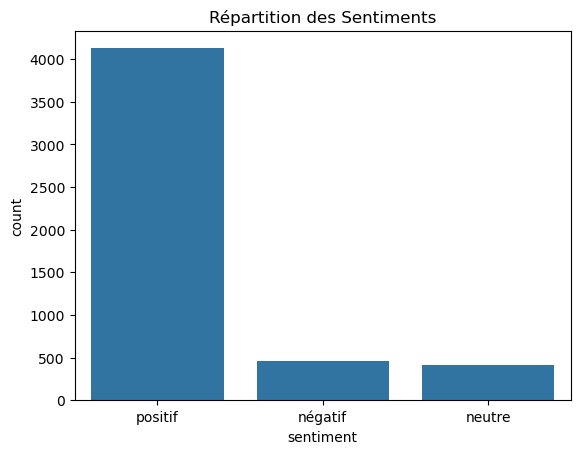

sentiment
positif    4127
négatif     463
neutre      410
Name: count, dtype: int64


In [57]:
# Affichage de la répartition des sentiments
sns.countplot(x='sentiment', data=process_reviews)
plt.title("Répartition des Sentiments")
plt.show()

# Affichage des comptes
print(process_reviews['sentiment'].value_counts())

In [58]:
from sklearn.utils import resample

# Séparation des classes
df_positif = process_reviews[process_reviews['sentiment'] == 'positif']
df_negatif = process_reviews[process_reviews['sentiment'] == 'négatif']
df_neutre = process_reviews[process_reviews['sentiment'] == 'neutre']

# Sur-échantillonnage des classes minoritaires
df_negatif_oversampled = resample(df_negatif, replace=True, n_samples=len(df_positif), random_state=42)
df_neutre_oversampled = resample(df_neutre, replace=True, n_samples=len(df_positif), random_state=42)

# Combinaison des données rééquilibrées
process_reviews_balanced = pd.concat([df_positif, df_negatif_oversampled, df_neutre_oversampled])

# Vérification de la répartition
print(process_reviews_balanced['sentiment'].value_counts())

sentiment
positif    4127
négatif    4127
neutre     4127
Name: count, dtype: int64


In [59]:
process_reviews_balanced.head()

,reviewText,overall,category,summary,reviewText_length,word_count,sentiment
0,waterpik total alternative traditional flossin...,5.0,All_Beauty_5,must brace,707,111,positif
1,masculine smell perfect camping festival etc d...,5.0,All_Beauty_5,hair body wash,104,14,positif
2,love hard find lotionfragrance well feel lotio...,5.0,All_Beauty_5,escada moon sparkle,133,20,positif
3,use winter beautiful fragrance seems bit much ...,5.0,All_Beauty_5,wonderful stuff,132,18,positif
4,colgate favorite brand toothpaste family alway...,4.0,All_Beauty_5,offer many benefit growing adult teeth,819,111,positif


**Conversion of Sentiments into Numeric Labels**  

Convert the sentiment labels (positive, negative, neutral) into numeric values (e.g., 1 for positive, -1 for negative, 0 for neutral).

In [61]:
# Conversion des sentiments en labels numériques
process_reviews_balanced['label'] = process_reviews_balanced['sentiment'].map({'positif': 2, 'négatif': 0, 'neutre': 1})

# Affichage des premières lignes pour vérifier
print(process_reviews_balanced[['sentiment', 'label']].head())

  sentiment  label
0   positif      2
1   positif      2
2   positif      2
3   positif      2
4   positif      2


In [62]:
Data_BO1 = process_reviews_balanced.copy()

In [63]:
Data_BO1.head()

,reviewText,overall,category,summary,reviewText_length,word_count,sentiment,label
0,waterpik total alternative traditional flossin...,5.0,All_Beauty_5,must brace,707,111,positif,2
1,masculine smell perfect camping festival etc d...,5.0,All_Beauty_5,hair body wash,104,14,positif,2
2,love hard find lotionfragrance well feel lotio...,5.0,All_Beauty_5,escada moon sparkle,133,20,positif,2
3,use winter beautiful fragrance seems bit much ...,5.0,All_Beauty_5,wonderful stuff,132,18,positif,2
4,colgate favorite brand toothpaste family alway...,4.0,All_Beauty_5,offer many benefit growing adult teeth,819,111,positif,2


In [64]:
Data_BO1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12381 entries, 0 to 2603
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviewText         12381 non-null  object 
 1   overall            12381 non-null  float64
 2   category           12381 non-null  object 
 3   summary            12381 non-null  object 
 4   reviewText_length  12381 non-null  int64  
 5   word_count         12381 non-null  int64  
 6   sentiment          12381 non-null  object 
 7   label              12381 non-null  int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 870.5+ KB


# **VI. Exploratory Data Analysis (EDA)**  

**1-Sentiment Distribution:** Visualize the distribution of sentiments (positive, negative, neutral).

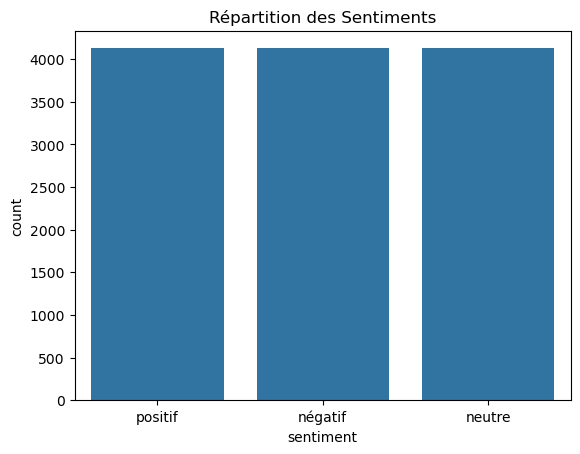

In [80]:
sns.countplot(x='sentiment', data=Data_BO1)
plt.title("Répartition des Sentiments")
plt.show()

**8-Most Frequent Words:** Identify the most frequent words in positive and negative reviews.

In [83]:
from collections import Counter
positive_words = Counter(" ".join(Data_BO1[Data_BO1['sentiment'] == 'positif']['reviewText']).split()).most_common(10)
negative_words = Counter(" ".join(Data_BO1[Data_BO1['sentiment'] == 'négatif']['reviewText']).split()).most_common(10)
print("Mots les plus fréquents dans les commentaires positifs :", positive_words)
print("Mots les plus fréquents dans les commentaires négatifs :", negative_words)

Mots les plus fréquents dans les commentaires positifs : [('great', 1215), ('book', 1117), ('one', 1079), ('like', 1032), ('love', 966), ('use', 881), ('good', 880), ('product', 845), ('time', 804), ('work', 771)]
Mots les plus fréquents dans les commentaires négatifs : [('one', 2033), ('book', 1834), ('time', 1619), ('window', 1528), ('product', 1519), ('like', 1496), ('get', 1466), ('work', 1462), ('would', 1439), ('software', 1375)]


**9-Comment Length:** Analyze the length of the reviews based on the sentiment.

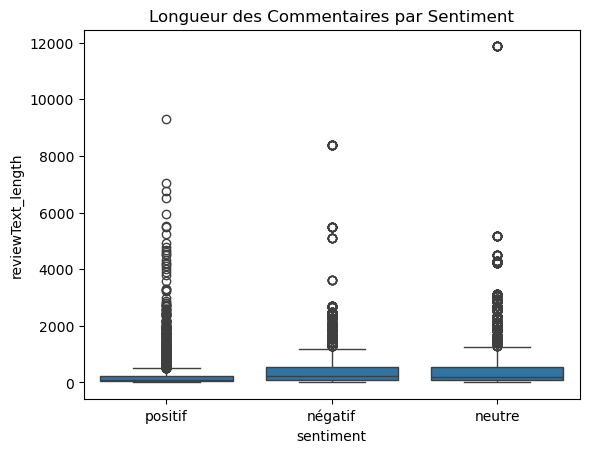

In [86]:
sns.boxplot(x='sentiment', y='reviewText_length', data=Data_BO1)
plt.title("Longueur des Commentaires par Sentiment")
plt.show()

**10-Interactive Visualization**  
Create interactive visualizations to explore the data.

**Word Cloud:** Visualize the most frequent keywords.

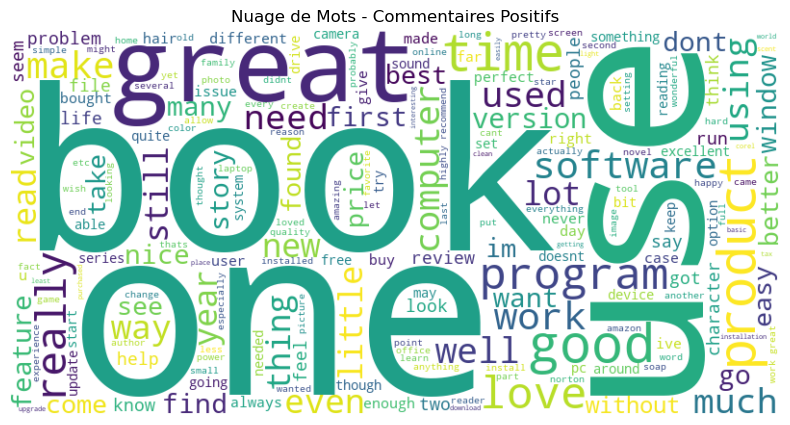

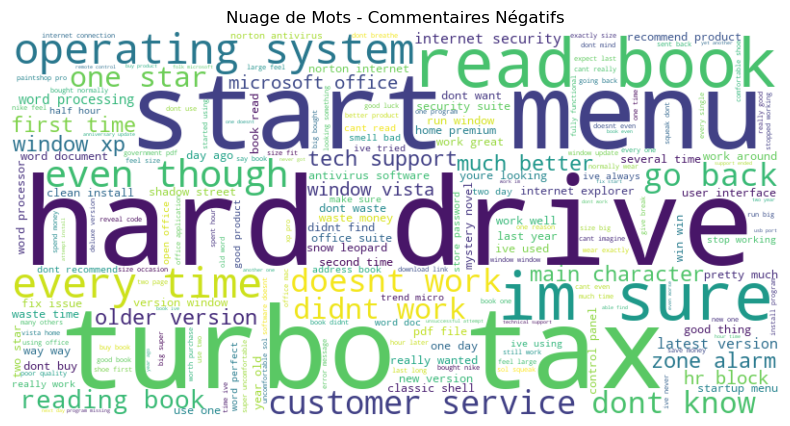

In [90]:
from wordcloud import WordCloud
positive_text = " ".join(Data_BO1[Data_BO1['sentiment'] == 'positif']['reviewText'])
negative_text = " ".join(Data_BO1[Data_BO1['sentiment'] == 'négatif']['reviewText'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de Mots - Commentaires Positifs")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de Mots - Commentaires Négatifs")
plt.show()

In [91]:
# Identifier les commentaires vides ou trop courts
empty_reviews = Data_BO1[Data_BO1['reviewText_length'] == 0]
print(f"Nombre de commentaires vides ou trop courts : {len(empty_reviews)}")

Nombre de commentaires vides ou trop courts : 40


In [92]:
# Supprimer les commentaires vides
Data_BO1 = Data_BO1[Data_BO1['reviewText_length'] > 0]

In [93]:
# Vérification des valeurs manquantes
assert Data_BO1['reviewText'].isnull().sum() == 0, "Il y a des valeurs manquantes dans 'reviewText'."
assert Data_BO1['summary'].isnull().sum() == 0, "Il y a des valeurs manquantes dans 'summary'."

# Vérification des labels de sentiment
assert set(Data_BO1['sentiment'].unique()) == {'positif', 'négatif', 'neutre'}, "Les labels de sentiment ne sont pas cohérents."

# Vérification de la longueur des commentaires
assert Data_BO1['reviewText_length'].min() > 0, "Il y a des commentaires vides ou trop courts."

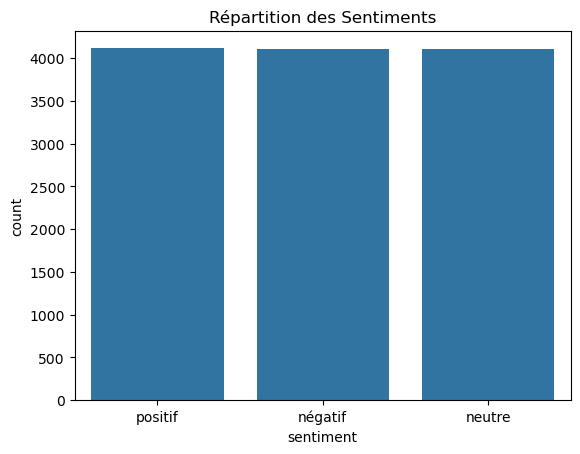

In [94]:
sns.countplot(x='sentiment', data=Data_BO1)
plt.title("Répartition des Sentiments")
plt.show()

In [95]:
print(Data_BO1['sentiment'].value_counts())

sentiment
positif    4117
négatif    4113
neutre     4111
Name: count, dtype: int64


In [96]:
# Sauvegarder les données préparées dans un fichier CSV
Data_BO1.to_csv('data_BO1.csv', index=False)

# Afficher un message de confirmation
print("Les données préparées ont été sauvegardées dans 'data_BO1.csv'.")

Les données préparées ont été sauvegardées dans 'data_BO1.csv'.


# **V. Data Splitting**

### **1- Data Splitting**  
Split your data into training, validation, and test sets.

In [99]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(Data_BO1, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [100]:
# Affichage des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {len(train_df)}")
print(f"Taille de l'ensemble de validation : {len(val_df)}")
print(f"Taille de l'ensemble de test : {len(test_df)}")

Taille de l'ensemble d'entraînement : 9872
Taille de l'ensemble de validation : 1234
Taille de l'ensemble de test : 1235


### **2- Saving Cleaned Data**  
Save the cleaned data for use in model fine-tuning.

In [102]:
train_df.to_csv('train_data_BO1.csv', index=False)
val_df.to_csv('val_data_BO1.csv', index=False)
test_df.to_csv('test_data_BO1.csv', index=False)

### **3- Conversion to Hugging Face Compatible Format**  
The Hugging Face model requires a specific format for the data. We will convert the DataFrames into Dataset objects.

# Modeling

# **Fine-Tuning NLP Models with Hugging Face**  
Structure the fine-tuning of NLP models.